<a href="https://colab.research.google.com/github/Arseniy16/Computational_Math/blob/main/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа 5
### *Численное интегрирование*

---

Написать программу для численного интегрирования фунции, заданной: a) точно, b) таблично. Исследовать точность реализованных методов.

1. Реализовать методы прямоугольников, трапеций.

2. Реализовать метод Симпсона.

3. Реализовать методы трапеций и прямоуголников с вычислением поправки Рунге.

<!-- 4. Реализовать возможность вычисления несобственных интегралов. -->

In [ ]:
import numpy as np
import numpy.linalg as npl
from numpy import double
import math
import matplotlib.pyplot as plt
from scipy.stats import linregress
%matplotlib inline


### Формулы для равномерной сетки
Будем приближать функцию на отрезке $[a, b]$ интерполяционным многочленом на равномерной сетке:

Для метода прямоугольников: 
$$
    P_0(x) = f(a) ⇒ \int_a^b f(x)dx \approx (b-a)f(a)
$$

Для метода трапеций:
$$
    P_1(x) = f(a) + f(a,b)(x-a) ⇒ \int_a^b f(x)dx \approx (b-a)\frac{f(a) + f(b)}{2}
$$


Для метода Симпсона(для случая $p = 2$):
$$
    \int_a^b f(x)dx \approx (b-a) \left[f(a)w_0 + f \left( \frac{a+b}{2} \right) w_1 + f(b)w_2 \right],
    \\
    w_0 = \frac{1}{2} \int_{-1}^1 \frac{x(x-1)}{2} dx = \frac{1}{6},
    \\
    w_1 = \frac{1}{2} \int_{-1}^1 (1 - x^2)dx = \frac{2}{3},
    \\
    w_2 = \frac{1}{2} \int_{-1}^1 \frac{x(x+1)}{2} dx = \frac{1}{6}
$$

То есть  $$ \int_a^b f(x)dx \approx = (b-a) \left( \dfrac{f(a) + 4f( \frac{a+b}{2} ) + f(b) }{6} \right) $$



### Реализуем каждый из методов 

In [ ]:
# метод правых прямоугольников

def rightRectangleMethodArr(x_arr, y_arr):
  size = x_arr.size
  integral = 0.0
  h_arr = [x_arr[i + 1] - x_arr[i] for i in range(size - 1)]
  h_arr.append(h_arr[size - 2])
  for i in range(size - 1):
    #print("countin at", a + (b - a) * h / N, "func = ", func(a + (b - a) * h / N))
    integral += y_arr[i] * h_arr[i]

  return integral

In [ ]:
# метод трапеций

def trapezoidalMethodArr(x_arr, y_arr):
  size = x_arr.size
  integral = 0.0
  h_arr = [x_arr[i + 1] - x_arr[i] for i in range(size - 1)]
  h_arr.append(h_arr[size - 2])
  for i in range(size - 1):
    #print("countin at", a + (b - a) * h / N, "func = ", func(a + (b - a) * h / N))
    integral += (y_arr[i] + y_arr[i + 1]) / 2 * h_arr[i]

  return integral

In [ ]:
# метод Симпсона

def SimpsonMethodArr(x_arr, y_arr):
  size = x_arr.size
  integral = 0.0
  h_arr = [x_arr[i + 1] - x_arr[i] for i in range(size - 1)]
  h_arr.append(h_arr[size - 2])
  for i in range(1, size - 1, 2):
    #print("countin at", a + (b - a) * h / N, "func = ", func(a + (b - a) * h / N))
    integral += (y_arr[i - 1] + 4 * y_arr[i] + y_arr[i + 1]) * h_arr[i] / 6

  return integral

Зная аналитически функции посчитаем интегралы для каждого из методов

In [ ]:
def rightRectangleMethod(func, a, b, N):
  h = (b - a) / N
  x_arr = np.zeros(N + 1, dtype = double)
  y_arr = np.zeros(N + 1, dtype = double)

  for i in range(N + 1):
    x_arr[i] = a + h * i
    y_arr[i] = func(x_arr[i])

  return rightRectangleMethodArr(x_arr, y_arr)

In [ ]:
def centralRectangleMethod(func, a, b, N):
  integral = 0.0
  h = (b - a) / N
  for i in range(N):
    #print("countin at", a + (b - a) * h / N, "func = ", func(a + (b - a) * h / N))
    integral += func(a + h / 2 + h * i ) * h

  return integral

In [ ]:
def trapezoidalMethod(func, a, b, N):
  h = (b - a) / N
  x_arr = np.zeros(N + 1, dtype = double)
  y_arr = np.zeros(N + 1, dtype = double)

  for i in range(N + 1):
    x_arr[i] = a + h * i
    y_arr[i] = func(x_arr[i])

  return trapezoidalMethodArr(x_arr, y_arr)

In [ ]:
def SimpsonMethod(func, a, b, N):
  h = (b - a) / N
  x_arr = np.zeros(N + 1, dtype = double)
  y_arr = np.zeros(N + 1, dtype = double)

  for i in range(N + 1):
    x_arr[i] = a + h * i
    y_arr[i] = func(x_arr[i])

  return SimpsonMethodArr(x_arr, y_arr)

###Реализуем методы трапеций и прямоуголников с вычислением поправки Рунге

In [ ]:
def rightRectangleMethodWithCorrection(func, a, b, N):
  if (N % 2):
    N -= 1
  integral_h1 = rightRectangleMethod(func, a, b, N)
  integral_h2 = rightRectangleMethod(func, a, b, int(N / 2))

  correction = (integral_h1 - integral_h2)
  # print(correction)

  return integral_h1 + correction

In [ ]:
def centralRectangleMethodWithCorrection(func, a, b, N):
  if (N % 2):
    N -= 1
  integral_h1 = centralRectangleMethod(func, a, b, N)
  integral_h2 = centralRectangleMethod(func, a, b, int(N / 2))

  #print(integral_h1, integral_h2)

  correction = (integral_h1 - integral_h2) / 3
  # print(correction)

  return integral_h1 + correction

In [ ]:
def trapezoidalMethodWithCorrection(func, a, b, N):
  if (N % 2):
    N -= 1
  integral_h1 = trapezoidalMethod(func, a, b, N)
  integral_h2 = trapezoidalMethod(func, a, b, int(N / 2))

  # print(integral_h1, integral_h2)

  correction = (integral_h1 - integral_h2) / 3
  # print(correction)

  return integral_h1 + correction

In [ ]:
def SimpsonMethodWithCorrection(func, a, b, N):
  if (N % 2):
    N -= 1
  integral_h1 = SimpsonMethod(func, a, b, N)
  integral_h2 = SimpsonMethod(func, a, b, int(N / 2))

  #print(integral_h1, integral_h2)

  correction = (integral_h1 - integral_h2) / 15
  # print(correction)

  return integral_h1 + correction

In [ ]:
def getGraph(x_arr, y_arr):
    plt.scatter(x_arr, y_arr, color= "red")
      
    plt.xlabel('log of N')
    plt.ylabel('log of error')
      
    plt.title('ln(eps)(ln(N))')
      
    plt.show()

    slope, intercept, r_value, p_value, std_err = linregress(x_arr, y_arr)
    print("slope =", slope)

### Протестируем каждый из методов

In [ ]:
def testRightRegtangles(steps):
    f = lambda x: x * x - x
    N_arr = [(2 ** n) for n in range (1, steps) ]
    epsilon = [ np.abs((rightRectangleMethod(f, 1, 2, n)) - 5 / 6) for n in N_arr ]

    print("right rectangles:")

    lnEps = [np.log(i) for i in epsilon]
    lnH = [np.log(i) for i in N_arr]

    getGraph(lnH, lnEps)

In [ ]:
def testCentralRegtangles(steps):
    f = lambda x: x * x - x
    N_arr = [(2 ** n) for n in range (1, steps) ]
    epsilon = [ np.abs((centralRectangleMethod(f, 1, 2, n)) - 5 / 6) for n in N_arr ]

    print("central rectangles:")

    lnEps = [np.log(i) for i in epsilon]
    lnH = [np.log(i) for i in N_arr]

    getGraph(lnH, lnEps)

In [ ]:
def testTrapezoidal(steps):
    f = lambda x: x * x - x
    N_arr = [(2 ** n) for n in range (1, steps) ]
    epsilon = [ np.abs((trapezoidalMethod(f, 1, 2, n)) - 5 / 6) for n in N_arr ]

    print("trapezoidal:")

    lnEps = [np.log(i) for i in epsilon]
    lnH = [np.log(i) for i in N_arr]

    getGraph(lnH, lnEps)

In [ ]:
def testSimpson(steps):
    f = lambda x: x * x * x * x - x * x * x
    # f = lambda x: x* x - x 
    N_arr = [(2 ** n) for n in range (1, steps) ]
    epsilon = [ np.abs((SimpsonMethod(f, 1, 2, n)) - 2.45) for n in N_arr ]
    # epsilon = [ np.abs((SimpsonMethod(f, 1, 2, n)) - 5 / 6) for n in N_arr ]

    print("simpson:")

    lnEps = [np.log(i) for i in epsilon]
    lnH = [np.log(i) for i in N_arr]

    getGraph(lnH, lnEps)

In [ ]:
def testRightRectanglesWithCorrection(steps):
    f = lambda x: x * x - x
    N_arr = [(2 ** n) for n in range (1, steps) ]
    epsilon = [ np.abs((rightRectangleMethodWithCorrection(f, 1, 2, n)) - 5 / 6) for n in N_arr ]

    print("right rectangles with correcion:")

    lnEps = [np.log(i) for i in epsilon]
    lnH = [np.log(i) for i in N_arr]

    getGraph(lnH, lnEps)


In [ ]:
def testCentralRectanglesWithCorrection(steps):
    f = lambda x: x * x * x * x
    N_arr = [(2 ** n) for n in range (1, steps) ]
    epsilon = [ np.abs((centralRectangleMethodWithCorrection(f, 1, 2, n)) - 6.2) for n in N_arr ]

    print(epsilon)

    print("central rectangles with correcion:")

    lnEps = [np.log(i) for i in epsilon]
    lnH = [np.log(i) for i in N_arr]

    getGraph(lnH, lnEps)

In [ ]:
def testTrapezoidalWithCorrection(steps):
    f = lambda x: x * x * x * x
    N_arr = [(2 ** n) for n in range (1, steps) ]
    epsilon = [ np.abs((trapezoidalMethodWithCorrection(f, 1, 2, n)) - 6.2) for n in N_arr ]

    print(epsilon)

    print("trapezoidal with correcion:")

    lnEps = [np.log(i) for i in epsilon]
    lnH = [np.log(i) for i in N_arr]

    getGraph(lnH, lnEps)

In [ ]:
def testSimpsonWithCorrection(steps):
    f = lambda x: x * x * x * x * x * x * x
    N_arr = [(2 ** n) for n in range (1, steps) ]
    epsilon = [ np.abs((SimpsonMethodWithCorrection(f, 1, 2, n)) - 32) for n in N_arr ]

    print(epsilon)

    print("Simpson with correcion:")

    lnEps = [np.log(i) for i in epsilon]
    lnH = [np.log(i) for i in N_arr]

    getGraph(lnH, lnEps)

right rectangles:


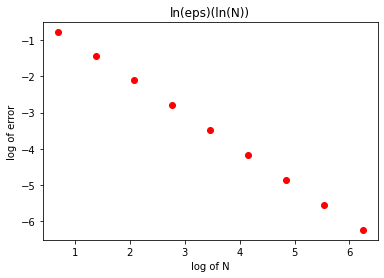

slope = -0.9875006588133223


In [ ]:
testRightRegtangles(10)

central rectangles:


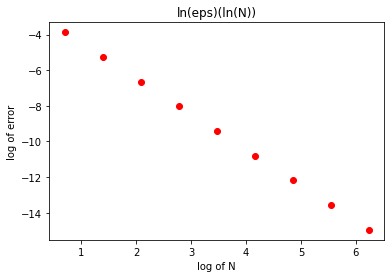

slope = -1.999999999986315


In [ ]:
testCentralRegtangles(10)

trapezoidal:


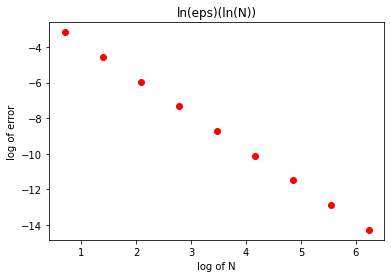

slope = -2.000000000006843


In [ ]:
testTrapezoidal(10)

simpson:


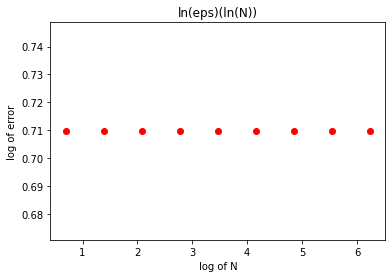

slope = -5.339044173024864e-17


In [ ]:
testSimpson(10)

right rectangles with correcion:


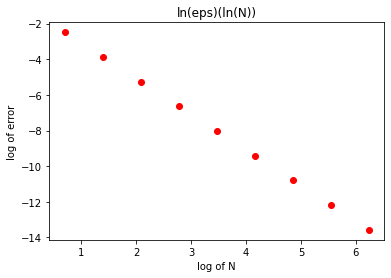

slope = -1.999999999996579


In [ ]:
testRightRectanglesWithCorrection(10)

[0.00729166666666714, 0.00045572916666714036, 2.8483072917140362e-05, 1.7801920577653618e-06, 1.1126200405442432e-07, 6.95387569749073e-09, 4.346176751823805e-10, 2.716404878810863e-11, 1.6981971384666394e-12]
central rectangles with correcion:


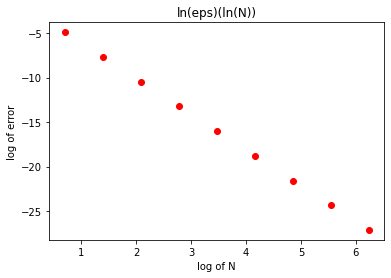

slope = -3.999971855934229


In [ ]:
testCentralRectanglesWithCorrection(10)

[0.00833333333333286, 0.0005208333333328596, 3.255208333285964e-05, 2.034505207859638e-06, 1.2715657504713818e-07, 7.947285496356926e-09, 4.96704899433098e-10, 3.104361212535878e-11, 1.9397816686250735e-12]
trapezoidal with correcion:


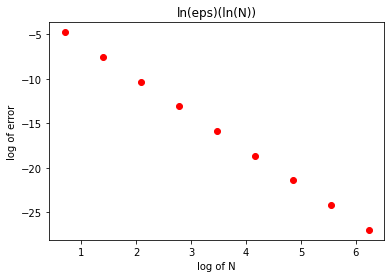

slope = -4.000024632217687


In [ ]:
testTrapezoidalWithCorrection(10)

[14.458333333333332, 16.060546875, 16.062469482421875, 16.062499523162842, 16.06249999254942, 16.062499999883585, 16.06249999999818, 16.06249999999997, 16.0625]
Simpson with correcion:


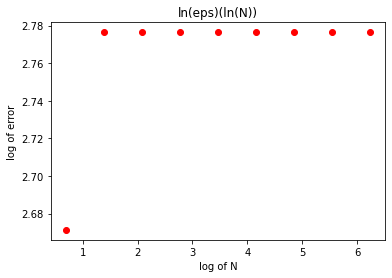

slope = 0.010128543685689344


In [ ]:
testSimpsonWithCorrection(10)

In [ ]:
f1 = lambda x: x + 1
f2 = lambda x: x * x
arr_size = 10

args = np.zeros(arr_size + 1, dtype = double)
ys = np.zeros(arr_size + 1, dtype = double)

for i in range(arr_size + 1):
  args[i] = 1 + 1 * i / arr_size
  ys[i] = f1(args[i])

#print(rightRectangleMethod(f2, 1, 2, 10))

#print(trapezoidalMethod(f1, 1, 2, 10))

print(SimpsonMethodArr(args, ys))
print(SimpsonMethod(f1, 1, 2, 10))

# print(rightRectangleMethodWithCorrection(f2, 1, 2, 10))
# print(centralRectangleMethod(f2, 1, 2, 10))
# print(centralRectangleMethodWithCorrection(f2, 1, 2, 10))

1.25
1.2499999999999996
